In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# Computing the Cost Function
Fill in the `compute_cost` function below:

In [4]:
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)


def calculate_mae(e):
    """Calculate the mae for vector e."""
    return np.mean(np.abs(e))


def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx.dot(w)
    return calculate_mse(e)

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [5]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err

Please fill in the functions `gradient_descent` below:

In [6]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, tx, w)
        loss = calculate_mse(err)
        # gradient w by descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [7]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=29.317568800842015, w1=5.391884973995655
Gradient Descent(1/49): loss=1015.0521848293532, w0=46.90811008134726, w1=8.627015958393
Gradient Descent(2/49): loss=375.26575477461876, w0=57.46243484965045, w1=10.5680945490314
Gradient Descent(3/49): loss=144.94263995491335, w0=63.79502971063234, w1=11.732741703414455
Gradient Descent(4/49): loss=62.02631861981966, w0=67.59458662722147, w1=12.431529996044297
Gradient Descent(5/49): loss=32.176442939185925, w0=69.87432077717496, w1=12.85080297162219
Gradient Descent(6/49): loss=21.43048769415776, w0=71.24216126714705, w1=13.10236675696893
Gradient Descent(7/49): loss=17.561943805947603, w0=72.06286556113031, w1=13.253305028176976
Gradient Descent(8/49): loss=16.169268006191952, w0=72.55528813752026, w1=13.343867990901805
Gradient Descent(9/49): loss=15.667904718279914, w0=72.85074168335424, w1=13.398205768536702
Gradient Descent(10/49): loss=15.487413934631581, w0=73.02801381085462, w1=13.43

<function __main__.plot_figure>

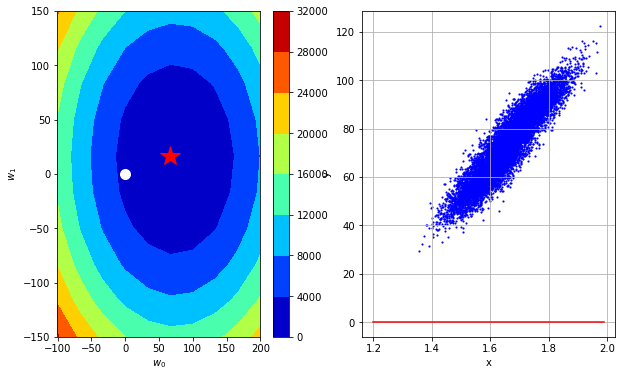

In [8]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        y, tx, compute_loss, gradient_losses, gradient_ws, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [9]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, _ = compute_stoch_gradient(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)

        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [10]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/49): loss=2619.6485087662622, w0=38.89931685812357, w1=76.92682725343019
SGD(1/49): loss=338.1779898537637, w0=90.22866295933372, w1=-5.46227142841434
SGD(2/49): loss=52.69627533820977, w0=75.27026794700978, w1=5.070501315935143
SGD(3/49): loss=28.57980584684605, w0=68.89700212807281, w1=10.823600318121157
SGD(4/49): loss=28.829126514856423, w0=68.81556661005921, w1=10.866130549035072
SGD(5/49): loss=43.24201099818939, w0=72.73153664687867, w1=6.036865602563521
SGD(6/49): loss=36.75555993934932, w0=71.31410545142181, w1=7.2491690745203945
SGD(7/49): loss=40.42801751781641, w0=72.96810544511564, w1=6.410193153654179
SGD(8/49): loss=52.16315040180627, w0=69.8352357515299, w1=5.631654427683345
SGD(9/49): loss=52.110231963964544, w0=69.88468800636016, w1=5.616773305596863
SGD(10/49): loss=47.24043738583509, w0=67.47760937054854, w1=8.01348828974894
SGD(11/49): loss=53.382960287744645, w0=70.77235200002826, w1=5.134903895396525
SGD(12/49): loss=51.31528359335093, w0=69.95135553748182,

<function __main__.plot_figure>

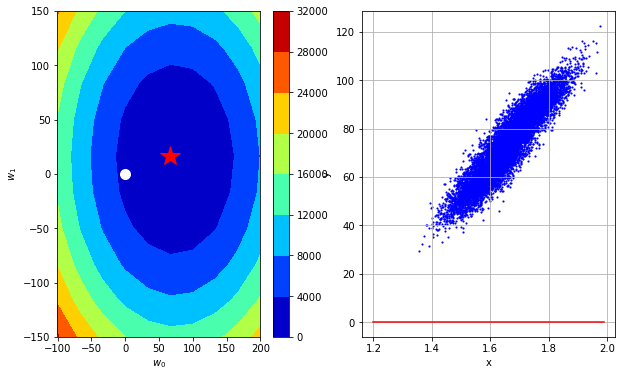

In [11]:
# Time Visualization

from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        y, tx, compute_loss, sgd_losses, sgd_ws, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))